In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os.path as osp
from glob import glob
import sys
sys.path.append('../../')
from constants import *
import os
import numpy as np
from scipy import stats


outdir = 'processed/'
os.makedirs(outdir, exist_ok = True)

In [2]:
performance = {}
#PPI - chemical, random (within)
base_path = '../../../results_metrics_aggregated_bme/perturbagen_pred'
paths = glob(osp.join(base_path, 'PDgrapher/within/chemical/val/MDAMB231_drugpred_within_best.csv'))

for path in paths:
    df = pd.read_csv(path)
    df = df[df['Set'] == 'Test']
    
    # Process the new DataFrame to update the dictionary
    method_name = '0'

    # Populate the dictionary
    for index, row in df.iterrows():
        cell_line = row['Cellline']
        metric = row['Metric']
        if metric == 'ranking score':
            metric = 'rankings'
        
        
        if cell_line not in performance:
            performance[cell_line] = {}
            
        if metric not in performance[cell_line]:
            performance[cell_line][metric] = {method_name: []}
        
        values = [row['Fold 1'], row['Fold 2'], row['Fold 3'], row['Fold 4'], row['Fold 5']]
        performance[cell_line][metric][method_name] = values

In [3]:
#Synthetic - missing components

base_path = '../../../results_metrics_aggregated_bme/synthetic_data/missing'
paths = glob(osp.join(base_path, '*_drugpred_within_best_v2.csv'))

for path in paths:
    df = pd.read_csv(path)
    df = df[df['Set'] == 'Test']
    
    # Process the new DataFrame to update the dictionary
    method_name = path.split('/')[-1].split('_')[0]

    # Populate the dictionary
    for index, row in df.iterrows():
        cell_line = 'MDAMB231'
        metric = row['Metric']
        if metric == 'ranking score':
            metric = 'rankings'
        
        
        if cell_line not in performance:
            performance[cell_line] = {}
            
        if metric not in performance[cell_line]:
            performance[cell_line][metric] = {method_name: []}
        
        values = [row['Fold 1'], row['Fold 2'], row['Fold 3'], row['Fold 4'], row['Fold 5']]
        performance[cell_line][metric][method_name] = values

In [4]:
performance['MDAMB231']['recall@1'].keys()

dict_keys(['0', '0.9', '0.8', '0.3', '0.6', '0.2', '1', '0.4', '0.5', '0.1', '0.7'])

## Percentage of partially accurate predictions

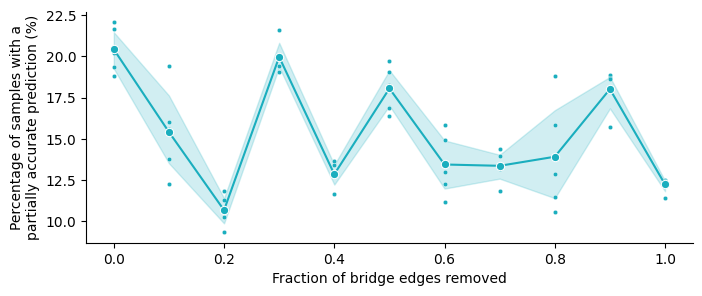

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the data for 'rankings' into a DataFrame
metric = 'percentage of samples with partially accurate predictions'
data = []
for cellline, metrics in performance.items():
    if metric in metrics:
        for method, values in metrics[metric].items():
            for value in values:
                data.append([cellline, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

# Ensure Method is treated as a numeric value
df['Method'] = df['Method'].astype(float)

# Calculate the mean 'rankings' for each cell line and method
df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()

# # Define a color palette that matches the existing figures
# palette = {
#     0: 'grey',
#     0.1: '#E2FAFA',
#     0.2: '#B0F3F0',
#     0.3: '#7DDCE0',
#     0.4: '#4BC5CF',
#     0.5: '#1AAEBE',
#     0.6: '#1AAEBE',
#     0.7: '#1AAEBE',
#     0.8: '#1AAEBE',
#     0.9: '#1AAEBE',
#     1: '#1AAEBE'
# }



# Initialize the plot with two subplots
fig, ax = plt.subplots(figsize=(7.35, 3.4), sharey=False)

with sns.plotting_context(plotting_context):
    sns.lineplot(ax=ax, data=df, x='Method', y=metric, color='#1AAEBE', marker='o', markersize=6)
    sns.scatterplot(ax=ax, data=df, x='Method', y=metric, color='#1AAEBE', s=10, legend=False)
    # ax1.set_xlabel('PPI confidence quantile cutoff')
    ax.set_ylabel('Percentage of samples with a\npartially accurate prediction (%)')
    # ax.set_ylim(0, 1.3)


    ax.set_xlabel('Fraction of bridge edges removed')  # X-axis title for Genetic
    # ax2.set_xlabel('')  # X-axis title for Genetic

    # Adjust layout
    plt.subplots_adjust(bottom=0.2, right=0.95)
    sns.despine()
    plt.savefig(osp.join(outdir, 'panel_partially_accurate_pred_lineplot.pdf'))
    plt.show()


## Panel ranking

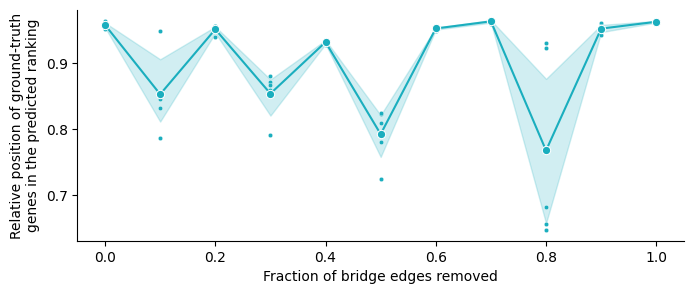

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the data for 'rankings' into a DataFrame
metric = 'rankings'
data = []
for cellline, metrics in performance.items():
    if metric in metrics:
        for method, values in metrics[metric].items():
            for value in values:
                data.append([cellline, method, value])

# Create a DataFrame
df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

# Ensure Method is treated as a numeric value
df['Method'] = df['Method'].astype(float)

# Calculate the mean 'rankings' for each cell line and method
df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()

# # Define a color palette that matches the existing figures
# palette = {
#     0: 'grey',
#     0.1: '#E2FAFA',
#     0.2: '#B0F3F0',
#     0.3: '#7DDCE0',
#     0.4: '#4BC5CF',
#     0.5: '#1AAEBE',
#     0.6: '#1AAEBE',
#     0.7: '#1AAEBE',
#     0.8: '#1AAEBE',
#     0.9: '#1AAEBE',
#     1: '#1AAEBE'
# }



# Initialize the plot with two subplots
fig, ax = plt.subplots(figsize=(7.35, 3.4), sharey=False)

with sns.plotting_context(plotting_context):
    sns.lineplot(ax=ax, data=df, x='Method', y=metric, color='#1AAEBE', marker='o', markersize=6)
    sns.scatterplot(ax=ax, data=df, x='Method', y=metric, color='#1AAEBE', s=10, legend=False)
    # ax1.set_xlabel('PPI confidence quantile cutoff')
    ax.set_ylabel('Relative position of ground-truth\ngenes in the predicted ranking')
    # ax.set_ylim(0, 1.3)


    ax.set_xlabel('Fraction of bridge edges removed')  # X-axis title for Genetic
    # ax2.set_xlabel('')  # X-axis title for Genetic

    # Adjust layout
    plt.subplots_adjust(bottom=0.2, right=0.95)
    sns.despine()
    plt.savefig(osp.join(outdir, 'panel_ranking_lineplot.pdf'))
    plt.show()


## Panels recall@k

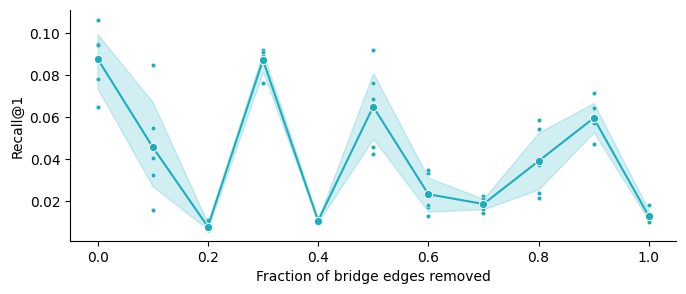

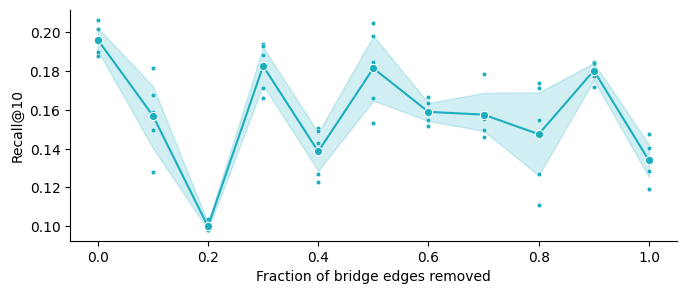

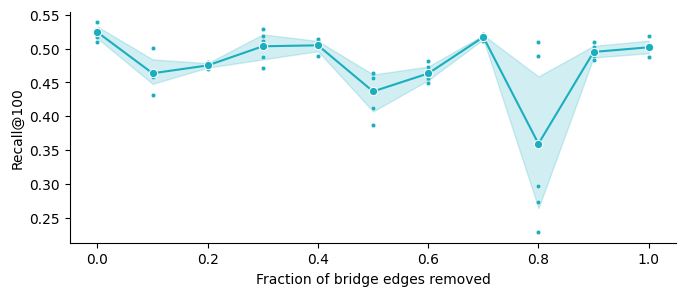

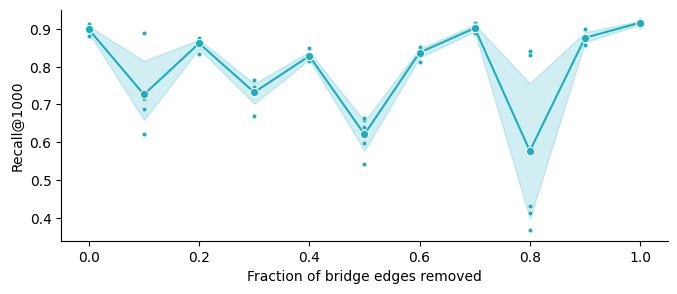

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the data for 'rankings' into a DataFrame
for metric in ['recall@1', 'recall@10', 'recall@100', 'recall@1000']:
    data = []
    for cellline, metrics in performance.items():
        if metric in metrics:
            for method, values in metrics[metric].items():
                for value in values:
                    data.append([cellline, method, value])

    # Create a DataFrame
    df = pd.DataFrame(data, columns=['Cell Line', 'Method', metric])

    # Ensure Method is treated as a numeric value
    df['Method'] = df['Method'].astype(float)

    # Calculate the mean 'rankings' for each cell line and method
    df_mean = df.groupby(['Cell Line', 'Method']).mean().reset_index()

    # # Define a color palette that matches the existing figures
    # palette = {
    #     0: 'grey',
    #     0.1: '#E2FAFA',
    #     0.2: '#B0F3F0',
    #     0.3: '#7DDCE0',
    #     0.4: '#4BC5CF',
    #     0.5: '#1AAEBE',
    #     0.6: '#1AAEBE',
    #     0.7: '#1AAEBE',
    #     0.8: '#1AAEBE',
    #     0.9: '#1AAEBE',
    #     1: '#1AAEBE'
    # }



    # Initialize the plot with two subplots
    fig, ax = plt.subplots(figsize=(7.35, 3.4), sharey=False)

    with sns.plotting_context(plotting_context):
        sns.lineplot(ax=ax, data=df, x='Method', y=metric, color='#1AAEBE', marker='o', markersize=6)
        sns.scatterplot(ax=ax, data=df, x='Method', y=metric, color='#1AAEBE', s=10, legend=False)
        # ax1.set_xlabel('PPI confidence quantile cutoff')
        ax.set_ylabel(metric.capitalize())
        # ax.set_ylim(0, 1.3)


        ax.set_xlabel('Fraction of bridge edges removed')  # X-axis title for Genetic
        # ax2.set_xlabel('')  # X-axis title for Genetic

        # Adjust layout
        plt.subplots_adjust(bottom=0.2, right=0.95)
        sns.despine()
        plt.savefig(osp.join(outdir, 'panel_{}.pdf'.format(metric)))
        plt.show()
